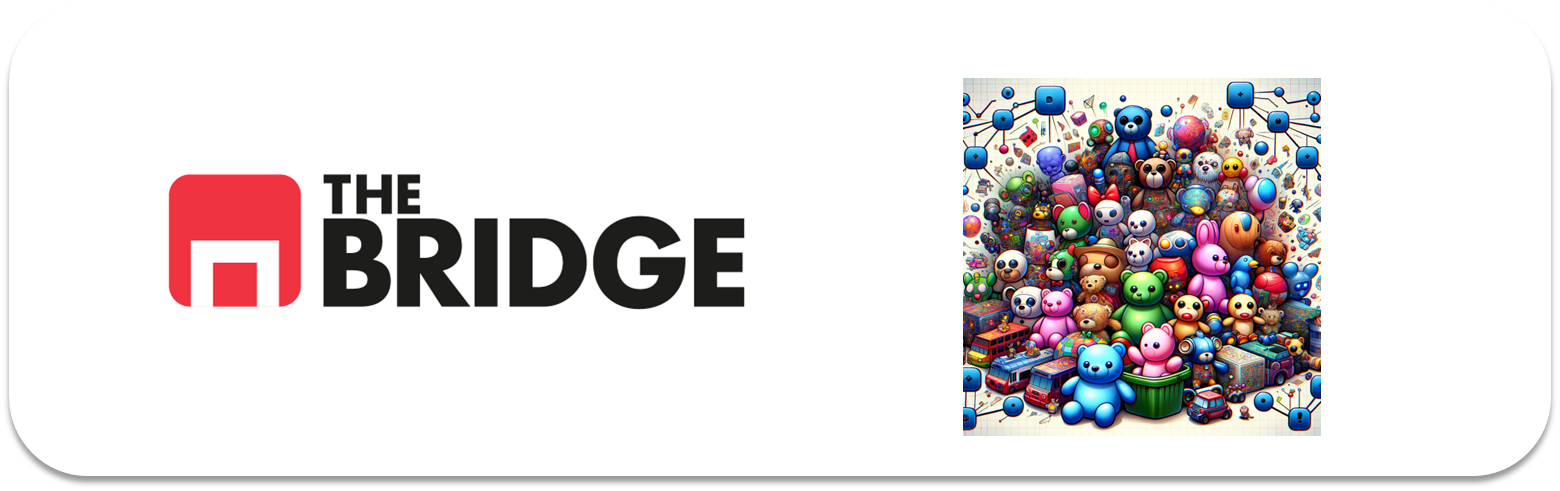

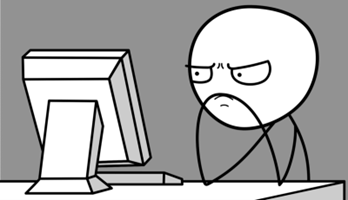

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [2]:
oli_faces = fetch_olivetti_faces()
print(oli_faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [3]:
oli_faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [4]:
oli_faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [5]:
# Obtener los datos y las etiquetas (target)
data = oli_faces.data
target = oli_faces.target

# Crear un DataFrame de pandas
columns = [f"pixel_{i+1}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)

# Agregar la columna de etiquetas al DataFrame
df['target'] = target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, pixel_1 to target
dtypes: float32(4096), int32(1)
memory usage: 6.3 MB


In [7]:
df.describe()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455,19.500000
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635,11.557853
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058,0.000000
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521,9.750000
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727,19.500000
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355,29.250000
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314,39.000000


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [8]:
# ver si lo hice bien

In [33]:
# Primera división: 80% para entrenamiento y 20% para conjunto temporal (validación + prueba)
train_set, temp_set, train_labels, temp_labels = train_test_split(df, target, test_size=0.2, stratify=target, random_state=42)

# Segunda división: Dividir el conjunto temporal en 50% para validación y 50% para prueba
val_set, test_set, val_labels, test_labels = train_test_split(temp_set, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

### #1.4

Crea los pares X,y para train, validation y test.

In [10]:
# train
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']

# validación
X_val = val_set.drop('target', axis=1)
y_val = val_set['target']

# test
X_test = test_set.drop('target', axis=1)
y_test = test_set['target']

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [11]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

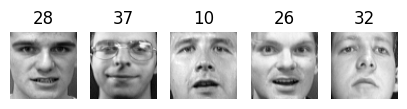

In [12]:
# Caras de ejemplo
plot_faces(X_train.sample(5).to_numpy(),y_train.sample(5).to_numpy())

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

222

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [14]:
# Creamos una list vacia
sil=[]

# valores de k
ks=[]

for k in range(5,151,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X_train_pca)      #por qué se usa fit_predict y no solo fit?

    sil_avg = silhouette_score(X_train_pca, labels)
    sil.append(sil_avg)
    ks.append(k)


In [15]:
# df con los valores de silhouette score
df_silhouette=pd.DataFrame({"k": ks, "silhouette_score":sil})
df_silhouette

,k,silhouette_score
0,5,0.105322
1,10,0.093861
2,15,0.094321
3,20,0.117600
4,25,0.115491
5,30,0.136058
6,35,0.146871
7,40,0.157273
8,45,0.157308
9,50,0.171176


In [16]:
# mejor valor de k, mayor puntuacion
df_silhouette.iloc[df_silhouette["silhouette_score"].idxmax()]

k                   115.000000
silhouette_score      0.219413
Name: 22, dtype: float64

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [17]:
import matplotlib.pyplot as plt

# Creo una lista de inercia vacía
inertia = []

# Valores de K
ks = []

# Aplicar K-Means para diferentes valores de K y calcular la inercia
for k in range(5, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit(X_train_pca)

    inertia.append(kmeans.inertia_)
    ks.append(k)


In [18]:
# Dataframe con las inercias
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertia})
df_inertias

,k,inertia
0,5,17026.003906
1,10,14840.102539
2,15,13418.141602
3,20,12374.773438
4,25,11419.953125
5,30,10414.177734
6,35,9686.614258
7,40,9190.473633
8,45,8671.349609
9,50,8071.517578


In [19]:
# mejor valor de k, menor inercia
df_inertias.iloc[df_inertias["inertia"].idxmin()]

k           150.000000
inertia    2652.701904
Name: 29, dtype: float64

Me dan valores bastantes diferentes, 115 con el metodo de las puntuaciones de la silueta y con el metodo del codo el mejor valor seria 150 pero por la grafica el codo puede estar en torno a k=60

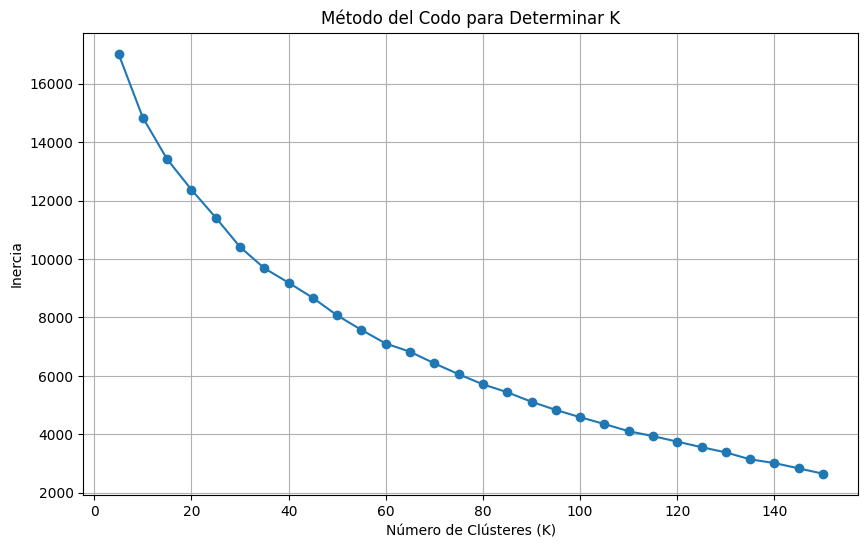

In [20]:
# Visualizar la curva de codo
plt.figure(figsize=(10, 6))
plt.plot(ks, inertia, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


El máximo silhoutte score se da para k=115


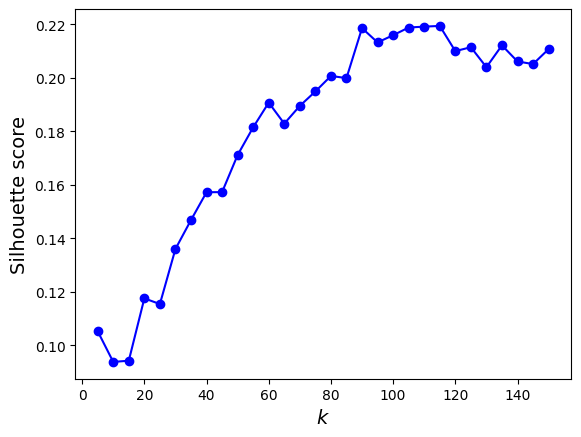

In [21]:
# Graficamos el silhouette score para cada k
plt.plot(ks, sil, "bo-");
plt.xlabel("$k$", fontsize=14);
plt.ylabel("Silhouette score", fontsize=14);
print(f"El máximo silhoutte score se da para k={ks[sil.index(max(sil))]}")

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [22]:
best_model=KMeans(n_clusters=115, random_state=42)
best_model.fit(X_train_pca)

KMeans(n_clusters=115, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

Cluster 0


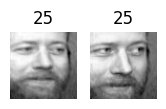

Cluster 1


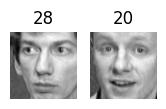

Cluster 2


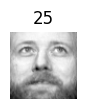

Cluster 3


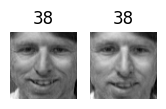

Cluster 4


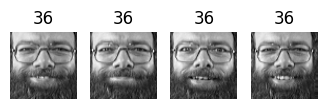

Cluster 5


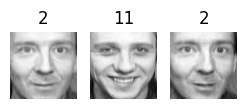

Cluster 6


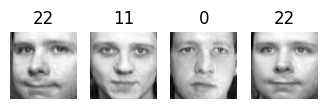

Cluster 7


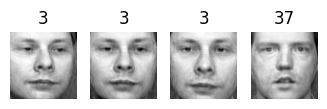

Cluster 8


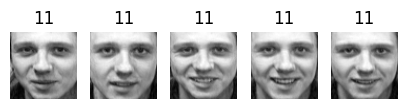

Cluster 9


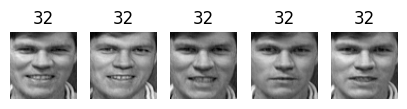

In [23]:
# Obtén las etiquetas de cluster para el mejor modelo
cluster_labels = best_model.fit_predict(X_train_pca)

# Obtiene los IDs únicos de los clusters
unique_cluster_ids = np.unique(cluster_labels)

# Muestra las primeras 10 imágenes de cada cluster
for cluster_id in unique_cluster_ids[:10]:
    print("Cluster", cluster_id)
    
    # Filtra las caras y etiquetas para el cluster actual
    in_cluster = cluster_labels == cluster_id
    faces_pca = X_train_pca[in_cluster]
    
    # Aplica la inversa de la transformación de PCA para obtener las características originales
    faces_original = pca.inverse_transform(faces_pca)
    
    # Utiliza la función plot_faces para mostrar las imágenes originales
    plot_faces(faces_original, y_train[in_cluster])


## **#2**


### #2.1


Parece que se aproxima bastante pero no es capaz de acertar al 100%. Eso que tiene demasiados clusters (lo recomendable seria 40 ya que hay 40 personas distintas)

Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [24]:
# Instanciamos el modelo
rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenamos el modelo
rnd_clf.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de validación
y_pred = rnd_clf.predict(X_val)

# Evaluamos la precisión del clasificador en el conjunto de validación
accuracy = accuracy_score(y_val, y_pred)
print("Precisión del clasificador RandomForest en el conjunto de validación:", accuracy)

Precisión del clasificador RandomForest en el conjunto de validación: 0.925


In [25]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [26]:
#Transformacion 
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

#Instanciamos y entrenamos el modelo
rnd_clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf_reduced.fit(X_train_reduced,y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [27]:
y_pred_valid = rnd_clf_reduced.predict(X_valid_reduced)
accuracy_reduced = accuracy_score(y_val, y_pred_valid)
print("Precisión:", accuracy_reduced)
print(classification_report(y_val, y_pred_valid))

Precisión: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       0.50      1.00      0.67         1
          1

Empeora la precision de 0.93 a 0.75

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

El accuracy máximo es 0.9 y se da para k=260


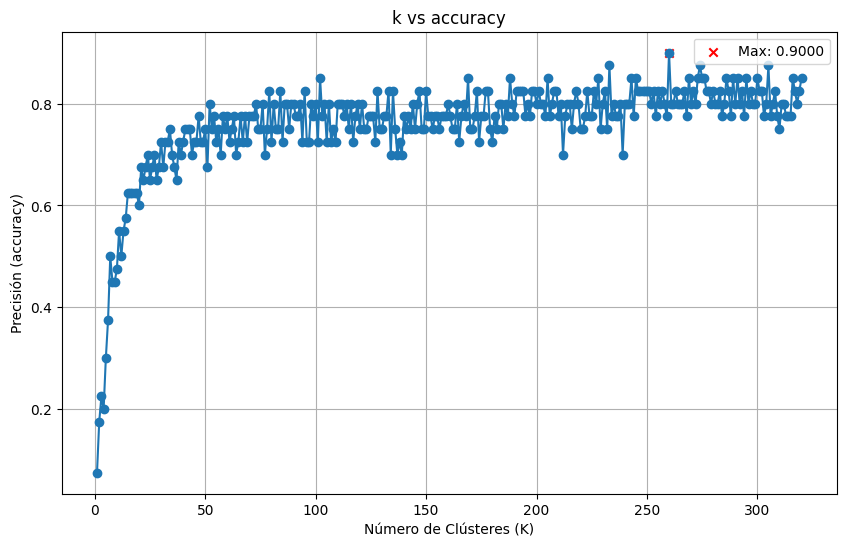

In [30]:
accuracy_max = 0
k_accuracy_max = 0
tamaño_muestra = len(X_train_pca)
ks = []
accuracy_dict = []

for k in range(1, tamaño_muestra + 1 , 1):
    # Instanciamos el modelo KMeans para cada k y lo entrenamos
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca, y_train)

    # Transformamos los DataFrames X
    X_train_reduced = kmeans.transform(X_train_pca)
    X_valid_reduced = kmeans.transform(X_valid_pca)

    # Instanciamos el modelo RandomForest
    rnd_clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
    rnd_clf_reduced.fit(X_train_reduced, y_train)

    # Realizamos predicciones en el conjunto de validación
    y_pred = rnd_clf_reduced.predict(X_valid_reduced)

    # Evaluamos y almacenamos si es mayor que el anterior
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        k_accuracy_max = k

    # Creamos un diccionario para guardar los datos
    ks.append(k)
    accuracy_dict.append(accuracy)

print(f"El accuracy máximo es {accuracy_max} y se da para k={k_accuracy_max}")

# Visualizamos la precisión en función del número de clústeres
plt.figure(figsize=(10, 6))
plt.plot(ks, accuracy_dict, marker='o')
plt.title('k vs accuracy')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Precisión (accuracy)')
plt.grid(True)
plt.scatter(k_accuracy_max, accuracy_max, color='red', marker='x', label=f'Max: {accuracy_max:.4f}', zorder=2)
plt.legend()
plt.show()


El accuracy máximo es 0.85 y se da para k=276


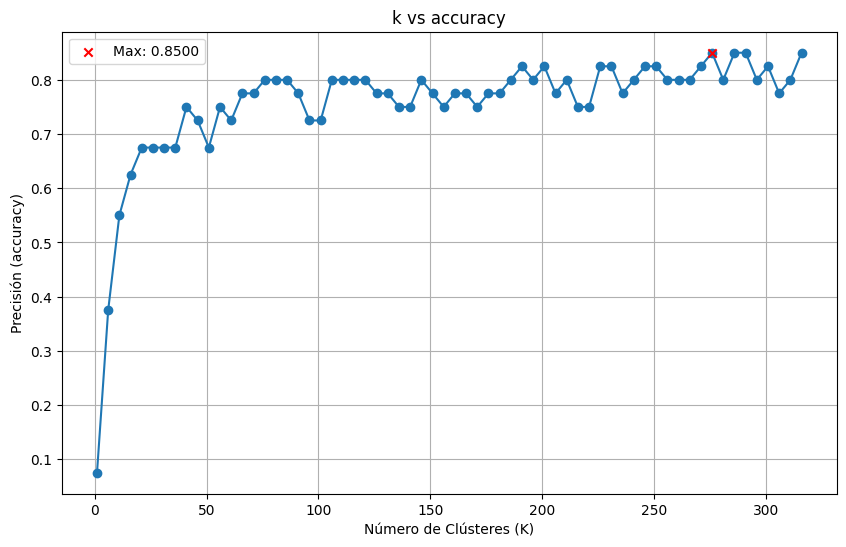

In [34]:
accuracy_max = 0
k_accuracy_max = 0
tamaño_muestra = len(X_train_pca)
ks = []
accuracy_dict = []

for k in range(1, tamaño_muestra, 5):
    # Instanciamos el modelo KMeans para cada k y lo entrenamos
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca, y_train)

    # Transformamos los DataFrames X
    X_train_reduced = kmeans.transform(X_train_pca)
    X_valid_reduced = kmeans.transform(X_valid_pca)

    # Instanciamos el modelo RandomForest
    rnd_clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
    rnd_clf_reduced.fit(X_train_reduced, y_train)

    # Realizamos predicciones en el conjunto de validación
    y_pred = rnd_clf_reduced.predict(X_valid_reduced)

    # Evaluamos y almacenamos si es mayor que el anterior
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        k_accuracy_max = k

    # Creamos un diccionario para guardar los datos
    ks.append(k)
    accuracy_dict.append(accuracy)

print(f"El accuracy máximo es {accuracy_max} y se da para k={k_accuracy_max}")

# Visualizamos la precisión en función del número de clústeres
plt.figure(figsize=(10, 6))
plt.plot(ks, accuracy_dict, marker='o')
plt.title('k vs accuracy')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Precisión (accuracy)')
plt.grid(True)
plt.scatter(k_accuracy_max, accuracy_max, color='red', marker='x', label=f'Max: {accuracy_max:.4f}', zorder=2)
plt.legend()
plt.show()